In [1]:
import numpy as np
import matplotlib.pyplot as plt

# a) Create a graphical representation of these points

In [2]:
x = np.load("londonIncidents.npz")
print(x['all'].shape)
print(x['all'], len(x['all'][0]),type(x['all'][0]))
coords = x['all']

(1238, 2)
[[  0.4178  -0.1783]
 [  0.918   -0.3686]
 [  0.9239  -0.7224]
 ...
 [ 45.4512 -14.289 ]
 [ 45.4562 -14.6374]
 [ 45.7309 -14.9927]] 2 <class 'numpy.ndarray'>


In [3]:
def graphData(coordinates):
    """
    Unpack data from a 2D np array and produce a scatter plot
    """
    xs, ys = zip(*coordinates)
    plt.scatter(xs,ys)
    plt.show
    return xs, ys

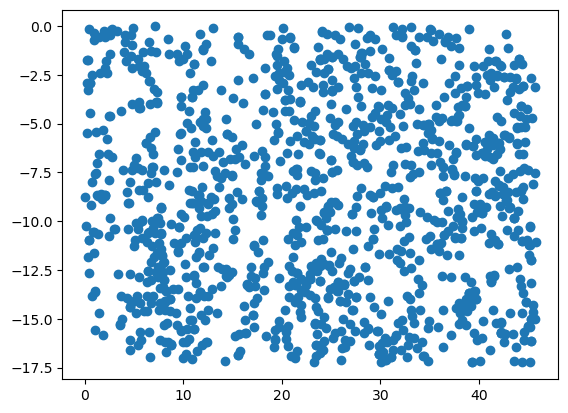

In [4]:
xs, ys = graphData(coords)

# b) Add vertical lines to your plot, dividing it into $N$ equal strips. Choose a value of $N$ somewhere between 10 and 20. Also add $M$ horizontal lines dividing it into equal strips.

<function matplotlib.pyplot.show(close=None, block=None)>

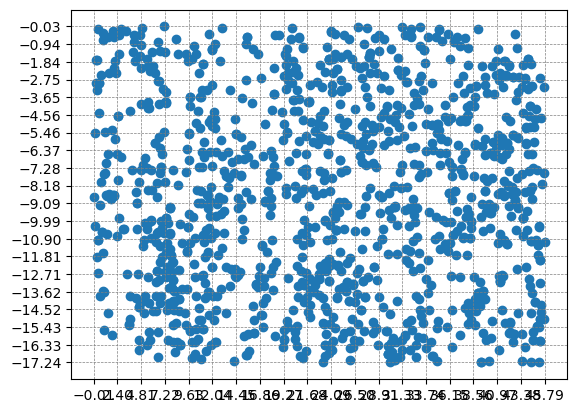

In [5]:
N = 20
M = 20
xticks = np.linspace(min(xs),max(xs),N)
yticks = np.linspace(min(ys),max(ys),M)
plt.scatter(xs,ys)
plt.grid(True, which='both', linestyle='--', lw=0.5, color='gray')
plt.xticks(xticks)  
plt.yticks(yticks)
plt.show

# c) Count how many dots lie in each  of the cells. Tally up how many cells have $0, 1 , \cdots $ dots in them. That gives you the frequency $F(\ell)$ to find $\ell$ dots in each cell, and hence an estimate for the probability $\mathscr{P}_{est}(\ell) = \frac{F(\ell)}{NM}$ that a cell will have $\ell$ dots. The average number of dots per cell is the total number divided by $NM$ .

In [6]:
def countDots2(xticks, yticks, dotCoords):
    
    num_y_gridlines = len(yticks)
    num_x_gridlines = len(xticks)
    x_coords, y_coords = zip(*dotCoords)
    grid_counts = np.zeros((num_y_gridlines, num_x_gridlines), dtype=int)
    
    # Assign coordinates to grid cells and count them
    for x, y in zip(x_coords, y_coords):
        col_idx = np.searchsorted(xticks, x) - 1
        row_idx = np.searchsorted(yticks, y) - 1
        if 0 <= col_idx < num_x_gridlines and 0 <= row_idx < num_y_gridlines:
            grid_counts[row_idx][col_idx] += 1
        
    return grid_counts

def getIndicies(array):
    
    indices = []
    for i in range(len(array)):
        for j in range(len(array[0])):
            indices.append(f"({i},{j})")
    return indices

In [7]:
c = coords.copy().tolist()
Fl = countDots2(xticks,yticks, c)
indices = getIndicies(Fl)

<function matplotlib.pyplot.show(close=None, block=None)>

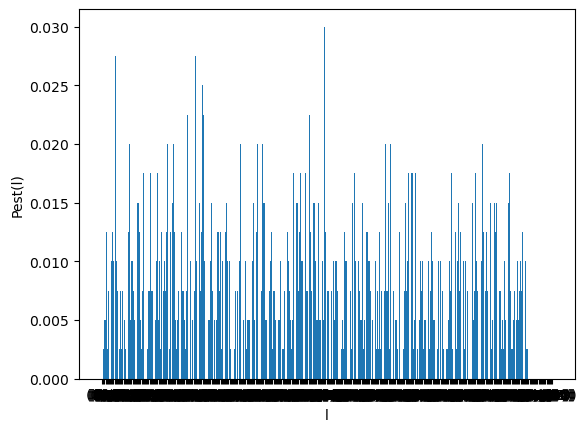

In [8]:
Fll = Fl.flatten().tolist()
Pl = [x/(N*M) for x in Fll]
plt.bar(indices,Pl)
plt.xlabel('l')
plt.ylabel("Pest(l)")
plt.show

# d) If we had a huge map with lots of cells, and dots distributed Uniformly and independently over that map with and average of $\mu$ per cell then the actual number observed in a cell would follow a particular probability distribution. What is it? Graph this distribution for a relevant range of $\ell$ values. Overlay a graph of the estimated distribution $P_{est}$ that you obtained in c). Does the resulting picture seem to support the null hypothesis?

If they were distributed uniformly and independentlywith a given mean, it would follow a poisson distribution. Since the estimated probability distribution does not follow this, the null hypothesis is supported

# e) For comparison, generate simulated data points that really are uniformly distributed over the region shown, and repeat the steps above.

In [9]:
# Generate uniformly distributed data
num_coordinates = len(coords)
x_coords = np.random.uniform(min(xs), max(xs), num_coordinates)
y_coords = np.random.uniform(min(ys), max(ys), num_coordinates)
generated_coords = np.array(list(zip(x_coords,y_coords)))

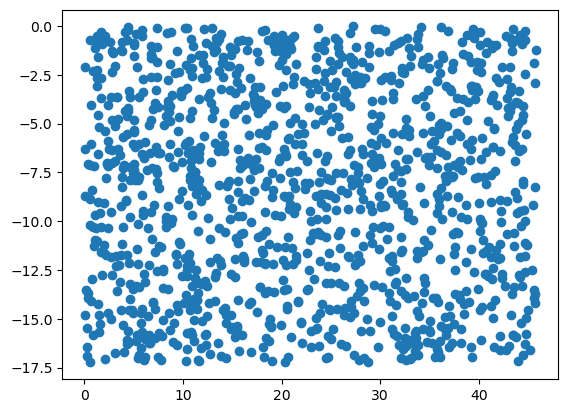

In [10]:
xd, yd = graphData(generated_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

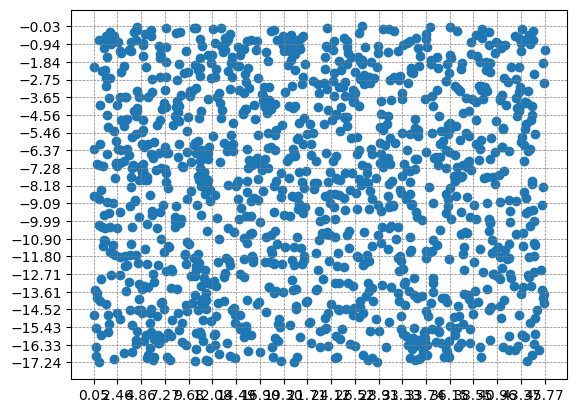

In [11]:
N = 20
M = 20
xticks = np.linspace(min(xd),max(xd),N)
yticks = np.linspace(min(yd),max(yd),M)
plt.scatter(xd,yd)
plt.grid(True, which='both', linestyle='--', lw=0.5, color='gray')
plt.xticks(xticks)  
plt.yticks(yticks)
plt.show

In [12]:
Fl2 = countDots2(xticks,yticks, generated_coords)
indices2 = getIndicies(Fl)

<function matplotlib.pyplot.show(close=None, block=None)>

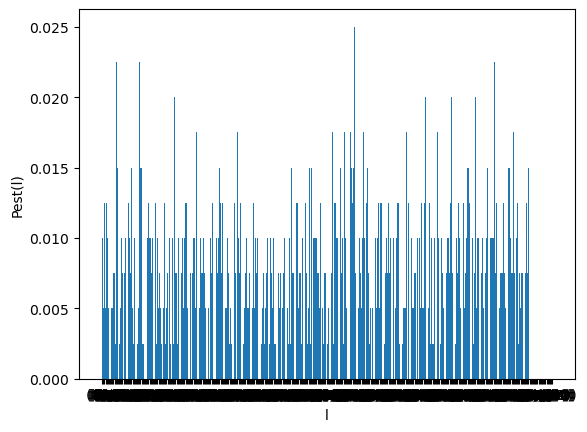

In [14]:
Fll2 = Fl2.flatten().tolist()
Pl2 = [x/(N*M) for x in Fll2]
plt.bar(indices2,Pl2)
plt.xlabel('l')
plt.ylabel("Pest(l)")
plt.show

Considering this is roughly the same as the distribution found earlier in park c), this supports the null hypothesis

In [ ]:
# Couldn't figure out why this didn't work, debugging left as an exercise for the grader
def countDots(xticks, yticks, dotCoords):
    Freq = []
    cells = []

    # Iterate through grid
    for i in enumerate(xticks):
        if i != (len(xticks)-1):
            for j,_ in enumerate(yticks):
                if j != (len(yticks)-1):
                    
                    # Define box 
                    bx1, bx2 = xticks[i], xticks[i+1]
                    by1, by2 = yticks[j], yticks[j+1]
                    cells.append(f"Coords are bx : ({round(bx1,2)},{round(bx2,2)}), by : ({round(by1,2)}, {round(by2,2)})")

                    # Count the number of dots in a box
                    l = 0
                    for dot in dotCoords:
                        x,y = dot[0],dot[1]
                        if (bx1 <= x <= bx2) and (by1 <= y <= by2):
                            l += 1
                            dotCoords.pop(dotCoords == [x,y])
                    Freq.append(l)
    for cell in cells:
        print(cell, "\n")
    return Freq, cells, dotCoords